# Пример 5. Задача xOr

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from numpy.random import normal as ND
import matplotlib.pyplot as plt
import numpy as np

## Подготовка данных

In [2]:
xor_cases = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
]

N = 10
random_shift = np.random.uniform(-0.1, 0.1, (4*N,3))
data = np.array(xor_cases*N) + random_shift
print("Исходные данные:", data.shape)
x_data, y_data = data[:,:2], data[:,2]
print("Признаки:", x_data.shape)
print("Метки:", y_data.shape)

test_data = np.array(xor_cases)
print("Данные для валидации:", test_data.shape)

Исходные данные: (40, 3)
Признаки: (40, 2)
Метки: (40,)
Данные для валидации: (4, 3)


## Создание модели

In [3]:
def model_builder():
    model = keras.Sequential([
        layers.Dense(5, input_shape = (2,), activation='relu', use_bias=False),
        layers.Dense(1, activation='relu', use_bias=False),
    ])
    
    optimizer = keras.optimizers.SGD()
    
    model.compile(loss = 'mse',
                  optimizer = optimizer)
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None


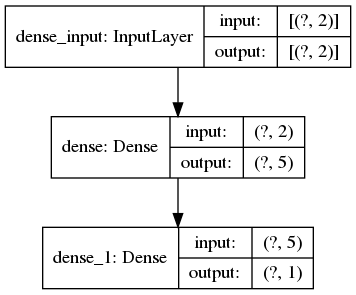

In [4]:
model = model_builder()
print(model.summary())
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

## Обучение

In [5]:
model = model_builder()
EPOCHS = 1000

In [6]:
history = model.fit(
    x_data, y_data,
    epochs=EPOCHS, verbose=0,
    validation_data = (test_data[:,:2], test_data[:,2])
)

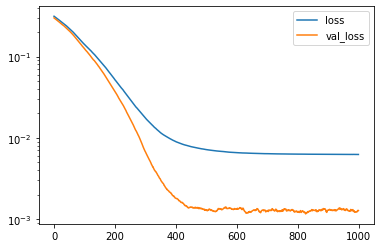

In [7]:
plt.plot(history.epoch, history.history['loss'], label = 'loss')
plt.plot(history.epoch, history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.yscale('log')

In [8]:
model.predict(x=test_data[:,:2])

array([[0.        ],
       [1.0588995 ],
       [0.9601062 ],
       [0.00432681]], dtype=float32)